Seaborn 是基于 matplotlib 开发的高阶 Python 数据可视图库，用于绘制优雅、美观的统计图形。

In [1]:
import seaborn as sns

本帖还有用到其它的库，声明如下

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
np.random.seed(1031)

在 Matplotlib 那贴已提过，个人偏好百度 Echarts 里面的一组颜色，因此将其 hex 颜色代码定义出来，其中红色的 r_hex 和深青色的 dt_hex 是大爱。

In [3]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

将上面自定义颜色设置为 seaborn 里调色板，当然你可以用它里面默认调色板。

In [4]:
color = ['#dc2624', '#2b4750', '#45a0a2', '#e87a59',
         '#7dcaa9', '#649E7D', '#dc8018', '#C89F91', 
         '#6c6d6c', '#4f6268', '#c7cccf']
sns.set_palette( color )

本章我们用以下思路来讲解：

1. 第一章深度了解 (in-depth) 配对图 (pairplot)，在讲解时，我们配用数据清洗的案例分析，可供以后的「机器学习」用。

2. 第二章广度了解 (in-breadth) 其他类型的图，只是做个简单展示。

# 1 深度了解 Seaborn

## 1.1 鸢尾花识别
假设我们要创建一个智能手机应用程序，从智能手机拍摄的照片中自动识别花的种类。 我们正在与一个数据科学家团队合作，该数据科学主管负责创建一个演示机器学习模型，测量花的萼片长度 (sepal length)，萼片宽度 (sepal width)，花瓣长度 (petal length) 和花瓣宽度 (petal width) 四个变量，并根据这些测量识别物种。

等等，萼片是什么鬼？萼片是花的最外一环。下图清晰指出花的萼片和花瓣。
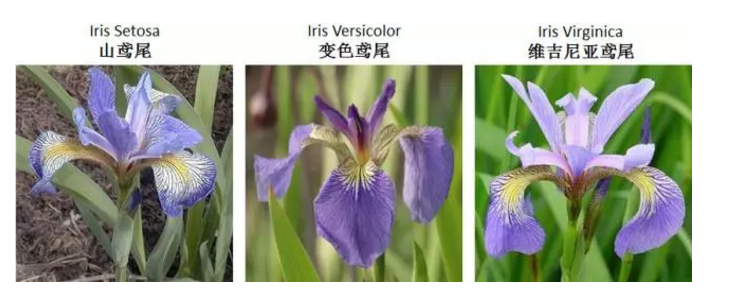
我们已经从现场研究人员获得了一个数据集，里面包括三种类型的鸢尾花的测量，如下图：
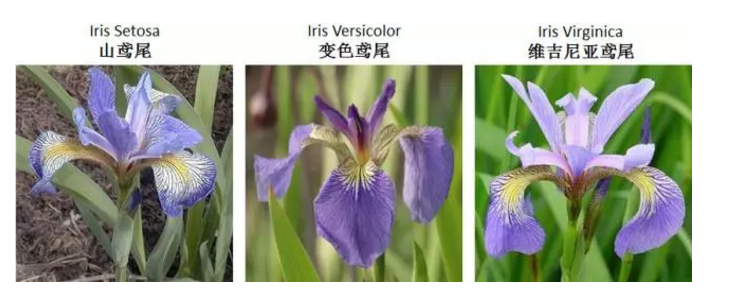
根据当地研究人员测量的每种鸢尾花的四个数据 (萼片长/宽和花瓣长/宽)，我们最终目的是想正确的分类这三种花。但重中之重的第一步是数据处理，有了干净数据之后再来机器学习很容易。

但怎么处理数据有时候更像一门艺术而不像一门科学。接下来会从

1. 检查数据
2. 清理数据
3. 测试数据

三方面来探索，在其过程中当然会借助 Seaborn。

### 检查数据
即便是政府或银行，他们公布的数据也有错误。在花费太多时间分析数据之前，提早检查并修正这些错误能节省大量时间。一般来说，我们希望回答以下问题：

1. 数据格式有什么问题吗？
2. 数据数值有什么问题吗？
3. 数据需要修复或删除吗？

#### 检查点 1. 数据格式
首先用 pandas 读取 csv 文件并将数据存成 DataFrame 格式。

In [5]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

函数 read_csv() 里面用到的两个参数

* 第一个 filename 是读取 csv 文件名
* 第二个参数用来把 csv 里面空白处用 NaN 代替

In [7]:
iris_data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


数据看起来是可用的 (大神 Hadley Wickhan 对干净数据的定义是，每一列代表一个特征；每一行代表一个样例)。

* 数据的第一行定义了列标题，标题的描述足以让我们了解每个列代表的内容 (萼片长度，萼片宽度，花瓣长度和花瓣宽度)，标题甚至给我们记录测量的单位 (cm, 厘米)

* 第一行之后的每一行代表一个花的观测数据：四个测量指标和一个类 (class)，它告诉我们花的种类。比如前 10 个都是山鸢尾花 (注意第 8 到 10 个的花瓣宽度没有数据，用 NaN 来表示)。


- 检查点 2. 数据统计

接下来，检查数据的分布可以识别异常值。我们从数据集的汇总统计数据开始。

In [8]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- describe() 函数的产出每列数据的个数 (count)，均值 (mean)，标准差 (std)，最小值 (min)，25, 50 和 75 百分位数 (25%, 50%, 75%) 和最大值 (max)。50 百分位数也就是中位数 (median)。

- 从该表中看到几个有用的值。 例如，我们看到缺少 5 条花瓣宽度的数据 (表里 count 那一行的萼片长度，萼片宽度和花瓣长度的个数都是 150 个，唯独花瓣宽度是 145 个)。

此外，这样的表给不了太多有用信息，除非我们知道数据应该在一个特定的范围 (如萼片长度的最小值是 0.055, 和它其他指标如均值和几个百分位数都不是量纲的，很有可能是测量错误)。 

你说表中这些数字看起来是不是很枯燥，为什么不用直观的图呢？现在 seaborn 可以派上用场了。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce

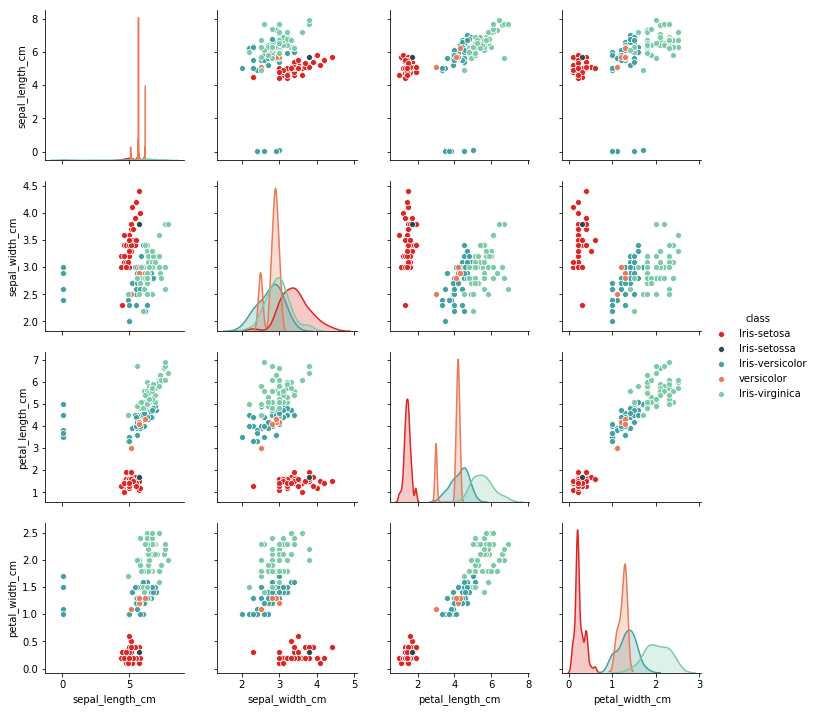

In [9]:
sns.pairplot(iris_data.dropna(), hue='class')

上面 pairplot() 函数里

- 第一个参数 iris_data.dropna() 就是除去 NaN 的数据表，这么做原因很简单，图里不可能显示的出 NaN 值的。

- 第二个参数 hue = 'class' 就是根据类 (class) 下不同的值赋予不同的颜色 (hue 就是色彩的意思) 。

让我们再回顾一下 iris_data 的前 10 行：

In [10]:
iris_data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


它有 5 列，前四列 (萼片长度，萼片宽度，花瓣长度和花瓣宽度) 可看成自变量，第五列 (类) 可看成变量。

配对图 (pairplot) 绘制前四列变量的关系图，而且用不同颜色区分不同的类下面的这四个变量。 从上图可知，横轴纵轴都有四个变量，那么总共可以画出 16 (4*4) 张小图。

- 对角线上的 4 张都是某个变量和自身的关系，用分布图 (dist plot)。

- 非对角线的 12 张就是某个变量和另一个变量的关系，用散点图 (scatter plot)。比如第一行第二列的图描述的就是萼片长度 (看纵轴第一个 sepal_length_cm 字样) 和萼片宽度 (看横轴第二个 sepal_width_cm 字样)。

从「配对图」中，我们可以迅速看出数据集上的一些问题：

1. 图的右侧标注这五个类 (Iris-setosa, Iris-setossa, Iris-versicolor, versicolor, Iris-virginica)，但原本要分类的花只有三类 (Iris-setosa, Iris-versicolor, Iris-virginica)。这意味着在记录数据时可能会犯下一些错误。

2. 在测量中有一些明显的异常值可能是错误的。

    a. 第二行的图 1-2-4 (或第二列的图1-2-4)，对于 Iris-setosa，一个萼片宽度 (sepal_width) 值落在其正常范围之外。

    b. 第一行后三张图 (或第一列后三张图)，对于 Iris-versicolor，几个萼片长度 (sepal_length) 值都接近零。

下一步我们的任务是要处理错误的数据。

- 修正点 1. 数据类别

问题：按理说鸢尾花应该只有三类，而图中却显示有五类。

在与现场研究人员交谈后，得知研究员

忘记在 Iris-versicolor 之前添加 Iris-
在 Iris-setossa 中多打了一个 s

让我们使来修正这些错误。

In [13]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

第一行将 versicolor 改为 Iris-versicolor；第二行将 Iris-setossa 改为 Iris-setosa；第四行用 unique() 函数 (unique 有唯一不重复的意思) 检验修改过的数据只有三类，更新后再画「配对图」。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


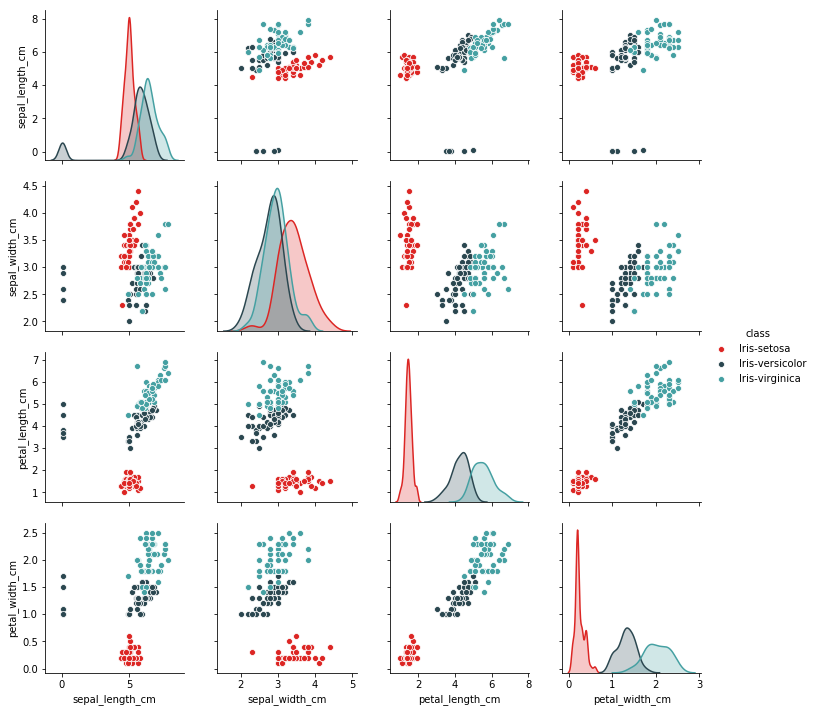

In [14]:
sns.pairplot(iris_data.dropna(), hue='class')

- 修正点 2. 异常值

修正异常值 (outliers) 是一件棘手的事情。因为我们很难判断异常值是否由测量误差引起，或者是不正确的单位记录数据，或者是真正的异常。如果我们决定排除任何数据，需要记录排除的数据并提供排除该数据的充分理由。由上节所知，我们有两种类型的异常值。

问题 1：山鸢尾花的一个萼片宽度值落在其正常范围之外 (黄色高亮)。
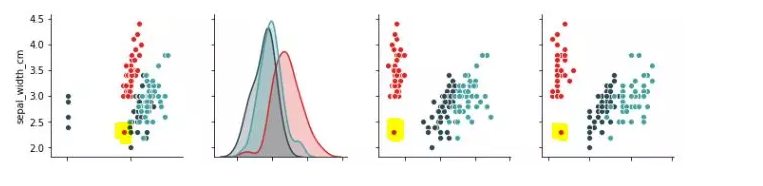

我们的研究人员知道，山鸢尾花 (Iris-setosa) 的萼片宽度 (sepal_width_cm) 不可能低于 2.5 厘米。显然，这个记录是错误的，这种情况下最有效的方法是删除它而不是花时间查找原因。但是，我们仍需要知道有多少个类似这样的错误数据，如果很少删除它没有问题，如果很多我们需要查明原因。

In [16]:
coud = (iris_data['class'] == "Iris-setosa") & (iris_data['sepal_width_cm'] < 2.5)
iris_data.loc[coud]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


上面代码是用数据表里的 loc[] 切片来找到类为 Iris-setoa 并且 sepal width 小于 2.5 的所有行。最后发现只有一个这样的数据，因此可以直接删除此数据。

去掉 Iris-setosa 里萼片宽度大于 2.5 厘米的数据，然后画出其条形图。

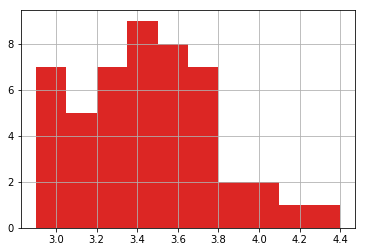

In [18]:
iris_data = iris_data.loc[~coud]
iris_data.loc[iris_data['class'] == 'Iris-setosa',
             'sepal_width_cm'].hist()

从上面条形图也看到了再没有这个异常值 (小于 2.5 厘米的点)。

完美！ 现在所有的山鸢尾花的萼片宽度都大于 2.5 厘米。

问题 2：变色鸢尾花的几个萼片长度值接近与零 (黄色高亮)。
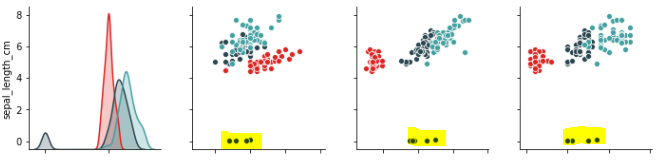
所有这些接近零的 sepal_length_cm 似乎错位了两个数量级，好像它们的记录单位米而不是厘米。在与实地研究人员进行了一些简短的对话后，我们发现其中一个人忘记将这些测量值转换为厘米。

我们使用代码来修正这些错误。

In [19]:
cond = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)
iris_data.loc[cond]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


上面代码是用数据表里的 loc[] 切片来找到类为 Iris-versicolor 并且 sepal length 接近零的所有行，发现有五个数据。

将萼片长度乘以 100 倍，从单位米换成单位厘米，然后画出其条形图。

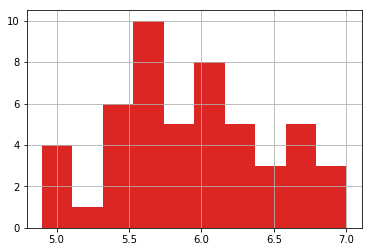

In [20]:
iris_data.loc[cond, 'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 
             'sepal_length_cm'].hist()

从上面条形图也看到了再没有这五个异常值  (零点零几的点)。

- 修正点 3. 缺失值

对了，我们还有些 NaN 这样的缺失值 (missing value)。通常我们有两种方式来处理这类数据。

1. 删除 (deletion)
2. 插补 (imputation)

在本例中删除不是理想的做法，特别是考虑到它们都在 Iris-setosa 下，如图：

所有缺失的值都属于 Iris-setosa类，直接删除可能会对日后数据分析带来偏差。此外，可以用插补方法，其最常见的方法平均插补 (mean imputation)。其做法就是“假设知道测量的值落在一定范围内，就可以用该测量的平均值填充空值”。

首先查看缺失值在 DataFrame 哪个位置。

In [21]:
iris_data.loc[iris_data['sepal_length_cm'].isnull()|
             iris_data['sepal_width_cm'].isnull()|
             iris_data['petal_length_cm'].isnull()|
             iris_data['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


上面代码里面 iris_data[A].isnull() 语句是找出 A 列中值为 NA 或 NaN 的行，而 "|" 是“或”的意思。因此上面整句话是找到萼片长度，萼片宽度，花瓣长度和花瓣宽度这四列下的所有含 NaN 的行数据，最后发现只有 5 行，而且 NaN  都来自花瓣宽度。

然后用 mean() 求出其宽度的平均值，用其将 NaN 值全部代替，最后打印出那 5 行插补后的 DataFrame。

In [22]:
isSetosa = iris_data['class'] == 'Iris-setosa'

average_petal_width = iris_data.loc[isSetosa, 'petal_width_cm'].mean()

iris_data.loc[isSetosa & (iris_data['petal_width_cm'].isnull()), 'petal_width_cm'] = average_petal_width

iris_data.loc[isSetosa & (iris_data['petal_width_cm']== average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


为了确保所有 NaN 值已被替换，再次用 iris_data[A].isnull() 语句来查看，出来的结果是一个只有列标题的空数据表。这表示表内已经没有 NaN 值了。

In [23]:
iris_data.loc[iris_data['sepal_length_cm'].isnull()|
             iris_data['sepal_width_cm'].isnull()|
             iris_data['petal_length_cm'].isnull()|
             iris_data['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


经过了修正类别、异常值和缺失值后，最后来看看基于干净数据画的「配对图」吧。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


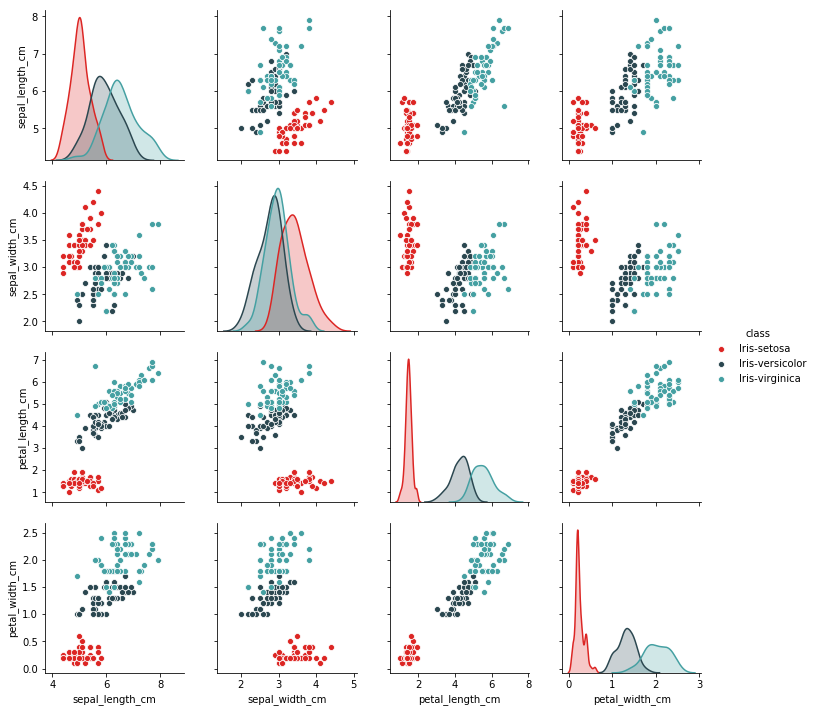

In [24]:
sns.pairplot( iris_data,  hue='class' )

从上图可看到：

1. 五个类变成三个类
2. 异常值全部被删除
3. 缺失值全部被插补

图整洁了，数据也干净了，之后可以用来做机器学习。

如果你不喜欢我自定义的配色的话，你可以随意用

- 用 set_style() 选五种风格：darkgrid, whitegrid, dark, white 和 ticks .
- 用 set_palette() 六种调色盘：deep, muted, pastel, bright, dark 和 colorblind

首先将风格初始化成 ticks。

In [27]:
sns.set(style='ticks')

## 1.2 无标签的图

假设我们不知道数据标签是什么 (无监督学习里的聚类问题)，那么画出来的「配对图」是单色调的。

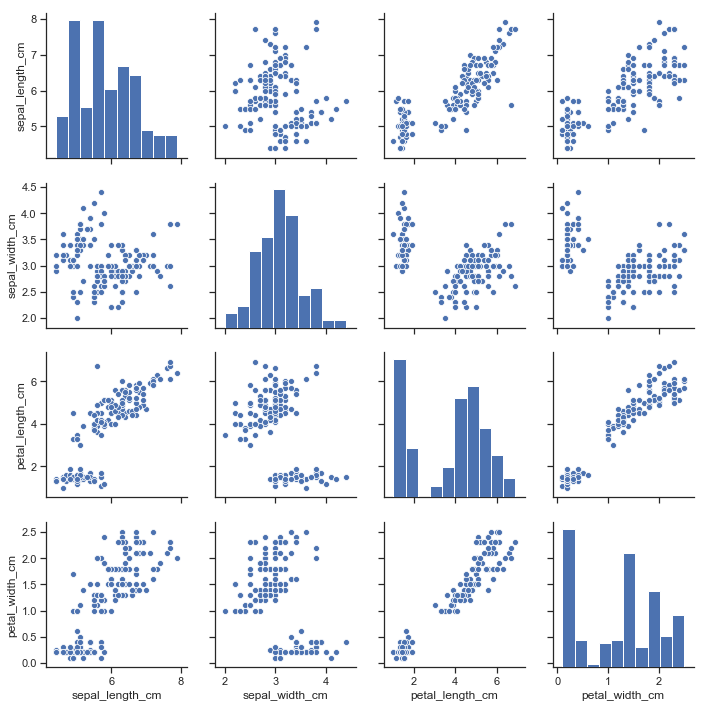

In [28]:
sns.pairplot(iris_data)

对角线上的图是直方图 (histgram)，非对角线上的散点图没有被不同的颜色区分。我们可以用 K-mean 聚类来得到 K 个不同簇，再和本身有的标签比对，看看聚类的效果如何 (在之后的 sklean 那贴再细讲)。

## 1.3 带标签的图

如果我们知道数据标签 (有监督学习里的分类问题)，那么画出来的「配对图」是多色调的，只需把 hue 变量设置成 DataFrame 数据里的标签名。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


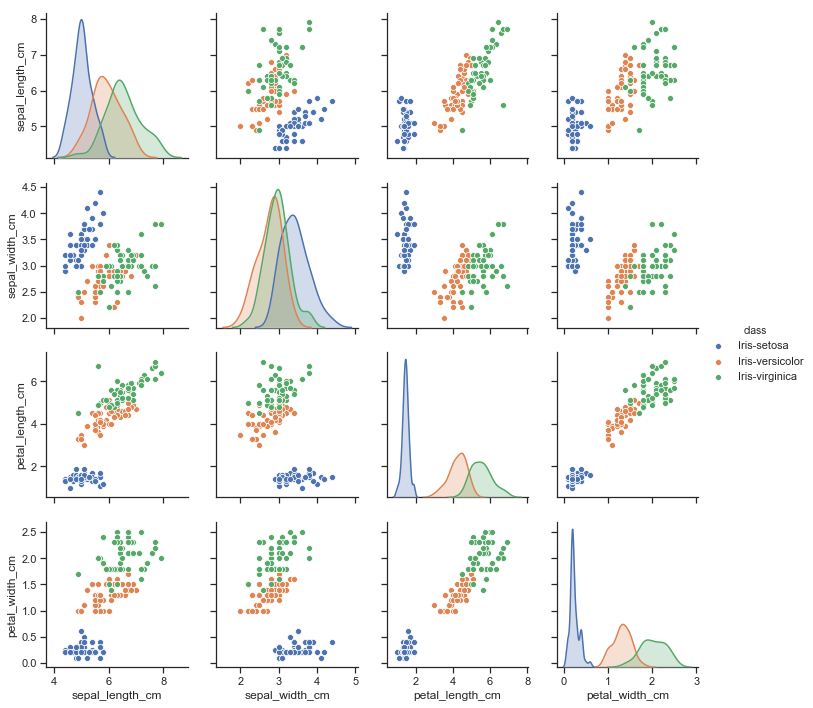

In [30]:
sns.pairplot( iris_data, hue='class' )

当细分了标签后，对角线图就是分布图 (distplot)，本例有三类，因此有三个分布。非对角线图还是散点图，只不过由不同颜色区分不同类别。


## 1.4 设置色板

将风格设置为 dark (背景变成灰色)，色板设置成 husl。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


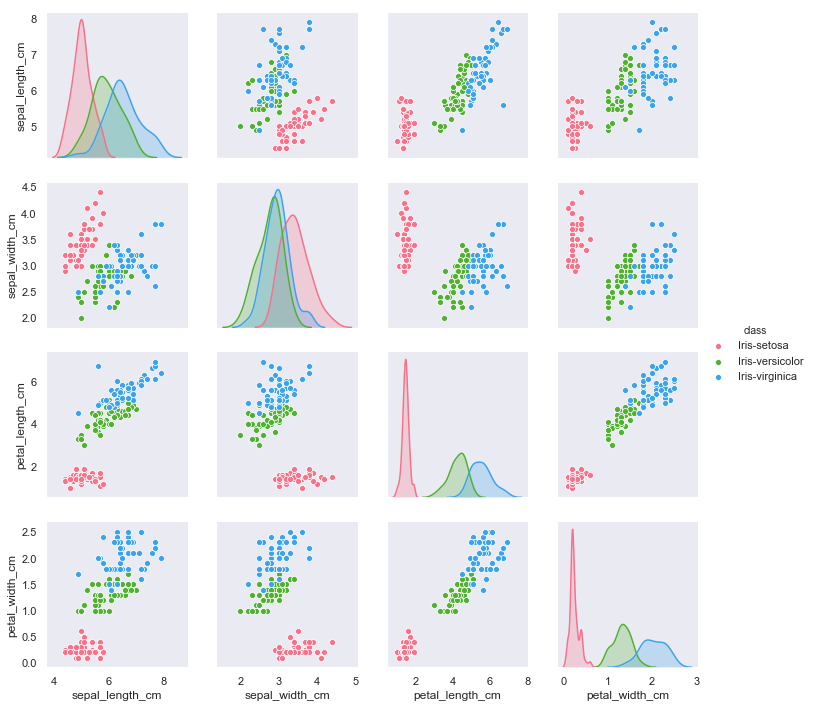

In [31]:
sns.set_style('dark')
sns.pairplot(iris_data, hue='class', palette='husl')

husl 其实就是一个色彩系统，取 10 个样本颜色展示如下：

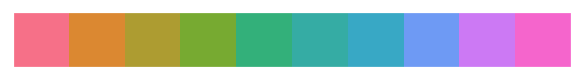

In [32]:

sns.palplot( sns.color_palette('husl',10) )

## 1.5 设置标记

将风格设置为 darkgrid (背景变成带网格的灰色)，色板设置成 colorblind 为色盲用户着想，甚至将不同类用圆形 (o)、正方形 (s) 和方块 (D) 来标记。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


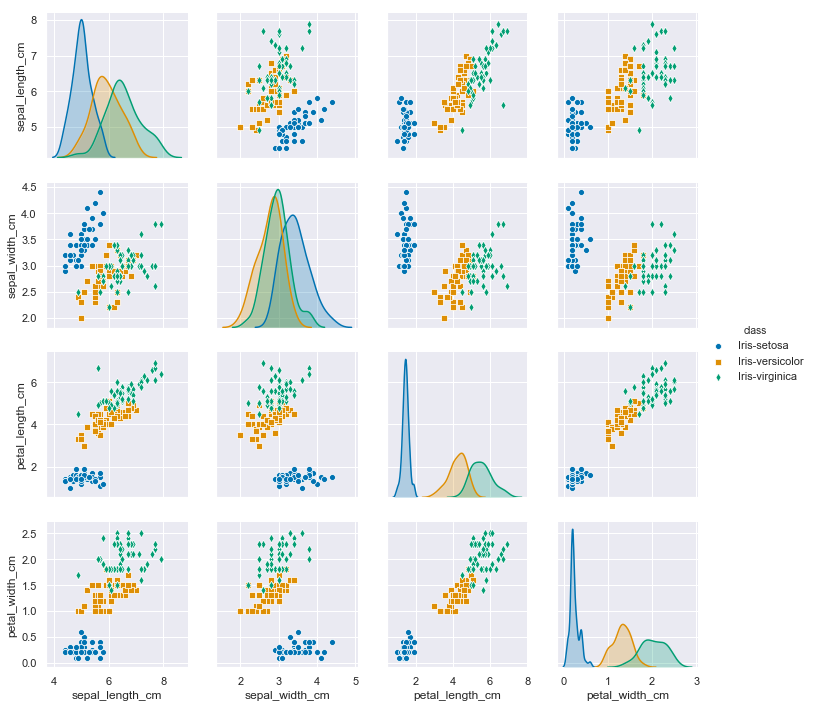

In [33]:
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.pairplot(iris_data, hue='class', markers=['o','s','d'])

## 1.6 子集图

如果我们不想展示所有变量之间的关系图，我们可以选择子集图。

将风格设置为 whitegrid (背景变成带网格的白色)，并将横轴和纵轴赋予相同的子集变量 (都是 vars)。

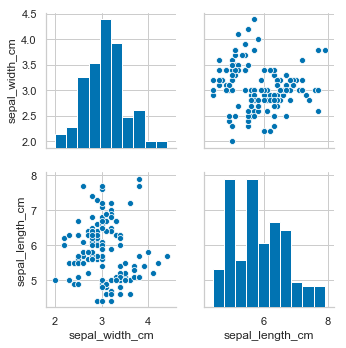

In [35]:
sns.set_style('whitegrid')
sns.pairplot(iris_data, vars=['sepal_width_cm','sepal_length_cm'])

将风格设置为 white (背景变成白色)，并将横轴和纵轴赋予不同的子集变量 (x_vars 和 y_vars)。

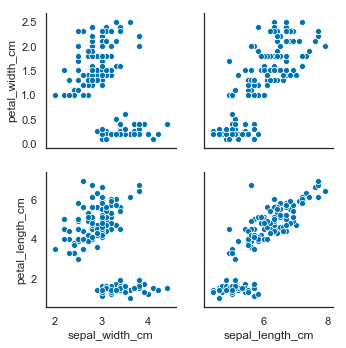

In [36]:
sns.set_style('white')
sns.pairplot( iris_data, 
              x_vars=['sepal_width_cm', 
                      'sepal_length_cm'],
              y_vars=['petal_width_cm', 
                      'petal_length_cm']);

## 1.7 线性回归图
pairplot() 除了画出变量之间的关系图，通过设置里面参数 kind = 'reg'，还可在非对角图上对那些散点做线性回归。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


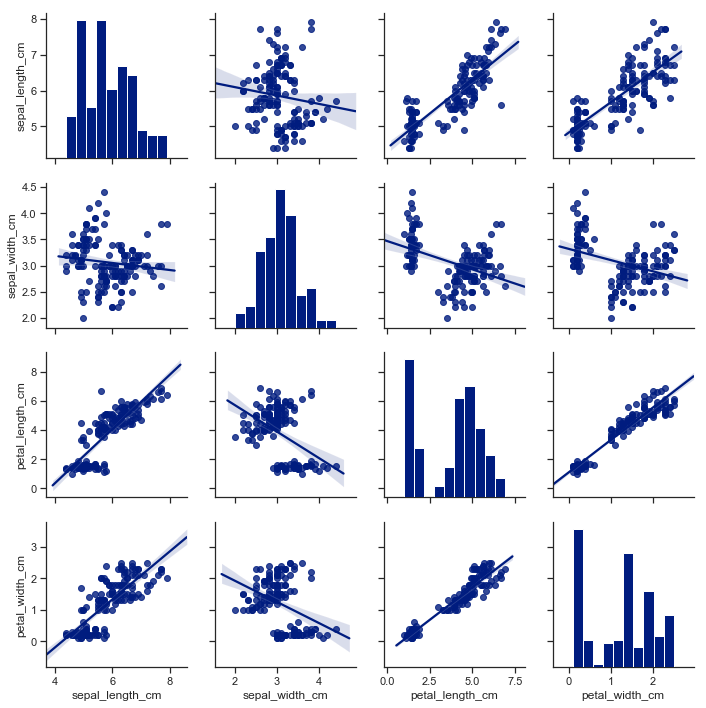

In [37]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data, kind='reg')

有个细节：色板设置成 dark，颜色顿时暗淡了许多 (深蓝)。 

## 1.8 核密度图
pairplot() 除了画出变量之间的关系图，通过设置里面参数 diag_kind = 'kde'，还可在对角图上对那些直方图的点做核密度估计 (KDE, kernel density estimation)，该技巧在做平滑数据时用到。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


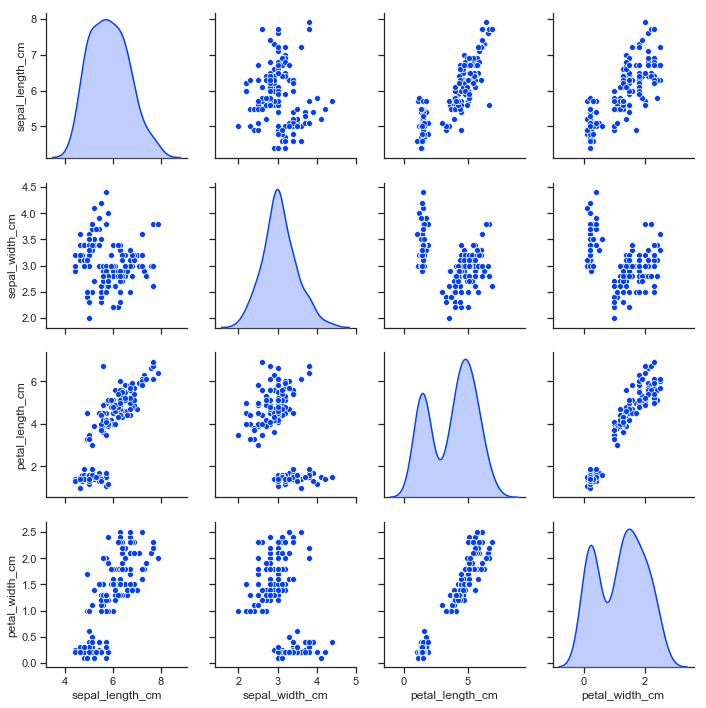

In [38]:
sns.set_palette('bright')
sns.pairplot(iris_data, diag_kind='kde')

# 2 广度了解 Seaborn

在本节中我们用 Seaborn 提供了内置数据集 Titantic 来展示

- 条形图 (barplot)
- 计数图 (countplot)
- 点图 (pointplot)
- 箱形图 (boxplot)
- 小提琴图 (violinplot)

然后用 Iris 数据来展示

- 箱形水平图 (boxplot h)
- 双变量分布图 (jointplot)


首先加载 Titanic 的数据。

In [39]:
titanic = sns.load_dataset('titanic')
titanic.head(3).append(titanic.tail(3))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


Titanic 数据集是非常适合数据科学和机器学习新手入门练习的数据集，它包含 1912 年泰坦尼克号沉船事件中一些乘客的个人信息以及存活状况。点击下图看该数据集的变量解释。

还是用引言中自定义的调色板

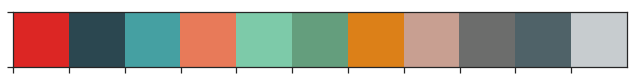

In [40]:

sns.set_palette( color )
sns.palplot( sns.color_palette(color,11) )

## 2.1 条形图

对于男性和女性 (x='sex')，根据不同船票各等舱 (hue='class')，统计其生还率 (y='survived')。用颜色区分舱的等级。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


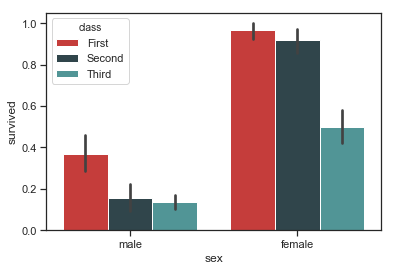

In [43]:
sns.pairplot(x='sex', y='survived', hue='class', data=titanic)
sns.barplot( x='sex', 
             y='survived',
             hue='class',
             data=titanic )

值得注意的是，条形图不仅显示点估计值 (point estimate)，还显示了置信区间 (confidence interval)。

由图可知，做一等舱和二等舱的女人生还率最高，三等舱的女人也比一等舱的男人生还率高。

## 2.2 计数图

统计每层客舱 (x='deck') 里的人数。


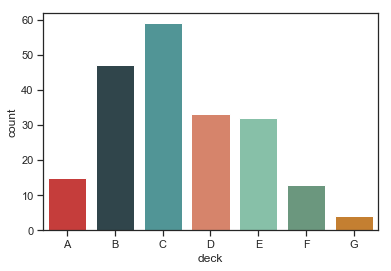

In [44]:
sns.countplot(x='deck', data=titanic)

C 舱里人数最多，G 舱里人数最少。


## 2.3 点图
统计每等舱 (x=‘class’) 不同性别 (hue='sex‘) 的生还率 (y='survived')。用颜色区分性别。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


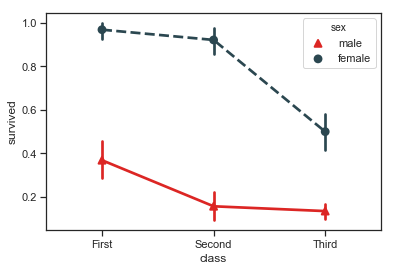

In [48]:
sns.pointplot(x='class', 
             y='survived',
             hue='sex',
             data=titanic,
             markers=['^','o'],
             linestyles=['-','--'])



点图也显示点估计和置信区间，由图可知，在各等舱中，女性生还率高于男性生还率高。

## 2.4 箱形图

统计在生还和死亡 (x='alive') 成年和未成年男性 (hue='adult_male') 的年龄分布 (y='age')。用颜色区分是否成年。

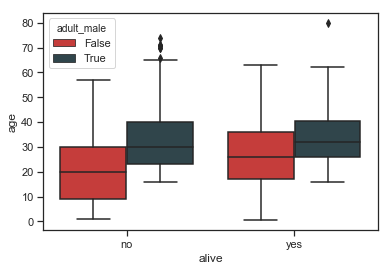

In [50]:
sns.boxplot(x='alive',
           y='age',
           hue='adult_male',
           data=titanic)

由图可看出，生还或死亡的男性在成年和未成年下的年龄分布很相似。


## 2.5 小提琴图

统计在男性和女性 (x='sex') 两类里生还和死亡 (hue='survived') 的年龄分布 (y='age')。用颜色区分生还率。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


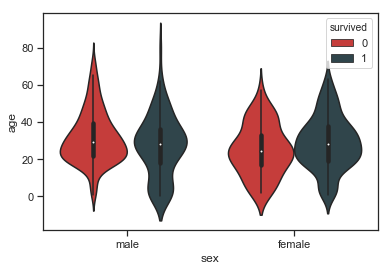

In [52]:
sns.violinplot(x='sex',
              y='age',
              hue='survived',
              data=titanic)

## 2.6 箱形水平图
画出萼片长度，萼片宽度，花瓣长度和花瓣宽度的箱形图 (横向)。上节也可以用这个图来找异常值。

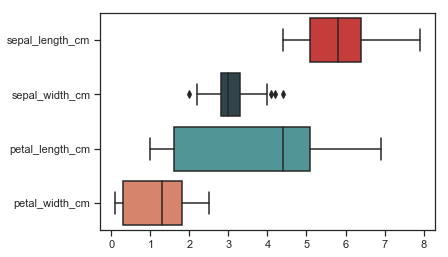

In [53]:
sns.boxplot(data=iris_data, orient='h')

## 2.7 双变量分布图
置 kind =‘kde’ 用双变量分布图画出萼片长度和萼片宽度的一维分布。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


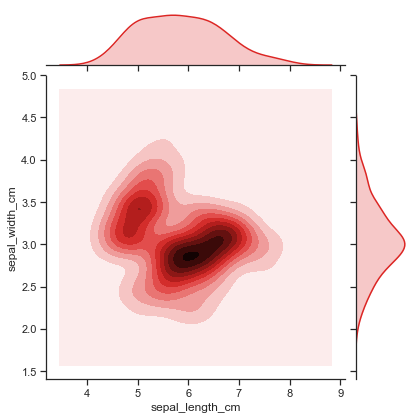

In [54]:
sns.jointplot( 'sepal_length_cm', 'sepal_width_cm',
                data=iris_data,
                kind='kde')

设置 kind =‘kde’ 用双变量分布图画出萼片长度和萼片宽度的线性关系。这时的分布用直方图表示。

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


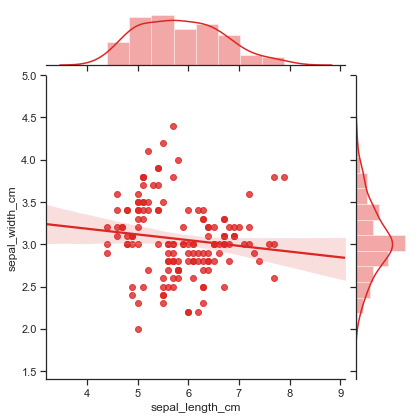

In [55]:
sns.jointplot( 'sepal_length_cm', 'sepal_width_cm',
                data=iris_data,
                kind='reg')

# 3 总 结

Seaborn 就是 Matplotlib 的升级版，底层绘图逻辑和元素层级就不用再重复了。

Seaborn 比 Matplotlib 强大的三个地方就是：

- 代码简单，基本都是一句话 (one-liner) 就可以画出变量之间统计关系图
- 能够处理分类 (categorical) 变量 (不仅仅只能处理连续变量)
- 颜色更加丰富好看 (不过这个看个人喜好)

下篇讨论用于炫酷可视化工具 PyEcharts 。Stay Tuned!